In [3]:
import os 
ABN =-176.45570973 
ZINC100 =  -22154.73868250
ABN_ZINC = ABN + ZINC100


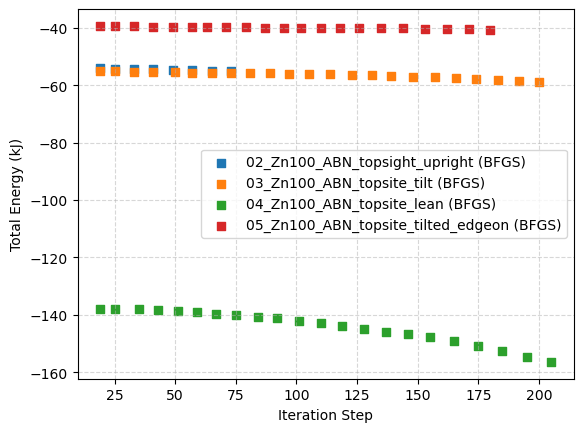

In [5]:
import os
import pandas as pd 
import matplotlib.pyplot as plt


dirs = [x for x in os.listdir() if os.path.isdir(x)]
colors = plt.cm.tab10.colors  # 10가지 색상을 사용

for idx, d in enumerate(dirs):
    csv_files = [x for x in os.listdir(d) if ".csv" in x]
    if not csv_files:
        continue
    csv_file = csv_files[0]
    df = pd.read_csv(os.path.join(d, csv_file))
    
    # 에너지 단위 변환 및 새로운 열 추가 (단위: kJ)
    df["ad_energy_kj"] = (df["energy"] - ABN_ZINC) * 2625.49884478051
    
    # 데이터의 앞 4개 step은 제외 (인덱스 4 이후 사용)
    df = df.iloc[4:]
    
    # "step_type" 컬럼이 있다면 BFGS와 SCF 데이터를 분리, 없으면 모두 SCF로 처리
    if "step_type" in df.columns:
        df_bfgs = df[df["step_type"] == "BFGS_step"]
        df_scf = df[df["step_type"] != "BFGS_step"]
    else:
        df_bfgs = pd.DataFrame(columns=df.columns)  # 빈 DataFrame
        df_scf = df
        
    # # SCF 단계: 원형 마커, 지정 색상
    # plt.scatter(df_scf.index, -abs(df_scf["ad_energy_kj"]),
    #             label=f"{d} (SCF)", marker='o', color=colors[idx % len(colors)], alpha = 0.7)
    
    # BFGS 단계: 정사각형 마커, 같은 색상으로 표시
    plt.scatter(df_bfgs.index, -abs(df_bfgs["ad_energy_kj"]),
                label=f"{d} (BFGS)", marker='s', color=colors[idx % len(colors)])
    
    # BFGS 데이터 포인트에 텍스트로 에너지 값을 표시 (소수점 둘째자리)
    # for i, row in df_bfgs.iterrows():
    #     plt.text(i, -abs(row["ad_energy_kj"]),
    #               f'{row["ad_energy_kj"]:.2f}',
    #              fontsize=8, color=colors[idx % len(colors)], ha='center', va='bottom')

plt.xlabel("Iteration Step")
plt.ylabel("Total Energy (kJ)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [9]:
df

,step,energy,ad_energy_kj
4,5,-22331.568682,-157.068578
5,6,-22331.567309,-153.462770
6,7,-22331.569063,-158.067974
7,8,-22331.567535,-154.058680
8,9,-22331.565577,-148.917874
...,...,...,...
466,467,-22331.572852,-168.018063
467,468,-22331.572854,-168.021897
468,469,-22331.572854,-168.022921
469,470,-22331.572854,-168.023131
